# Install Modul

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca Data dan Retrieve Data

In [ ]:
df = pd.read_csv("calonpembelimobil.csv")
df

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


# Preprocessing Data

Memakai kolom usia dan penghasilan untuk targetnya "Beli_Mobil".

In [ ]:
X = df[['Usia', 'Penghasilan']]
y = df['Beli_Mobil']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Proses Standarisasi


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training SVC nya dan melakukan prediksi

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

# Prediksi
y_pred = svc.predict(X_test)


# Evaluasi Modelnya


In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 56   8]
 [  3 133]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        64
           1       0.94      0.98      0.96       136

    accuracy                           0.94       200
   macro avg       0.95      0.93      0.94       200
weighted avg       0.95      0.94      0.94       200



# Bentuk Plot Grafik Prediksi

Text(0, 0.5, 'Penghasilan')

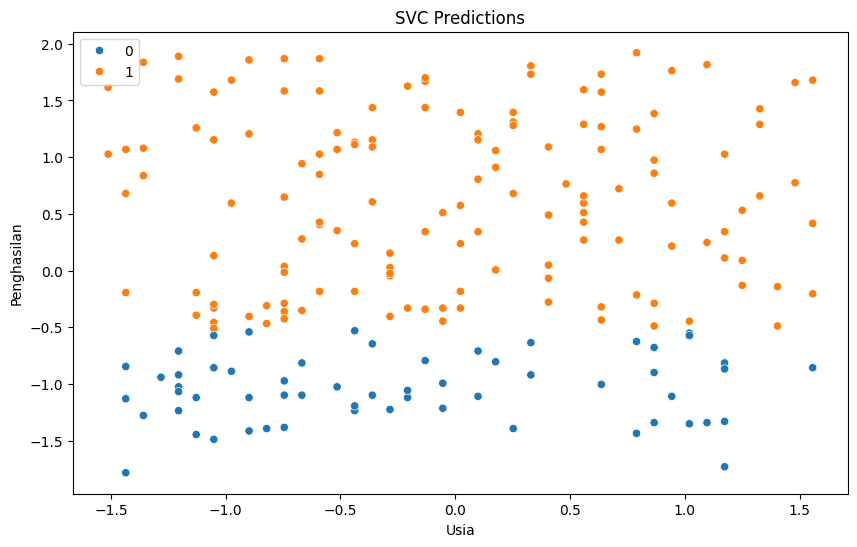

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred)
plt.title('SVC Predictions')
plt.xlabel('Usia')
plt.ylabel('Penghasilan')
